In [9]:
#statistical simultions of the repeater coverage 


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

class TX:
    x_coordinate_m=0
    y_coordinate_m=0
    EIRP_dBm=40

class RX:
    x_coordinate_m=0
    y_coordinate_m=0
    EIS_dBm_Hz=-174


    
    
class ABG_Chan:
    alpha=3.53
    betha=22.4
    gamma=2.13
    LOS_exp=70
    shadowing=10

def path_loss (d_m, Channel):
    p_LOS= np.exp(-d_m/Channel.LOS_exp)
    
    return(p_LOS*(62+20*np.log10(d_m))+ (1-p_LOS)* (10*Channel.alpha*np.log10(d_m)+Channel.betha+10*np.log10(28)*Channel.gamma+Channel.shadowing))



    
def throughput (SNR_dB, BW_MHz, SE_table):
    i=np.abs(SE_table[:,1]- SNR_dB). argmin()
    if   ( SE_table[i,1] > SNR_dB):
        if i>0:
            i=i-1
        else:
            return(0)
    return(SE_table[i,0] * BW_MHz)
    
    
def find_distance (x1,y1,x2,y2):
    return (pow((x1-x2)**2+ (y1-y2)**2, 0.5 ))

def find_closeset_RE_distance(x1,x2,RE):
    
    dmin=find_distance(x1,x2, RE[0].x_coordinate_m, RE[0].y_coordinate_m)
    for i in range( 1, len(RE)):
        if find_distance(x1,x2, RE[i].x_coordinate_m, RE[i].y_coordinate_m) < dmin:
            dmin=find_distance(x1,x2, RE[i].x_coordinate_m, RE[i].y_coordinate_m)
    return(dmin)
    
    
BW=400e6

Cell_rad_m=300

Ch=ABG_Chan

gNB=TX()
gNB.EIRP_dBm=60
gNB.x_coordinate_m=0
gNB.y_coordinate_m=0

RE_EIRP=35
RE1=TX()
RE1.EIRP_dBm=RE_EIRP
RE1.x_coordinate_m= Cell_rad_m *0.8
RE1.y_coordinate_m= 0

RE2=TX()
RE2.EIRP_dBm=RE_EIRP
RE2.x_coordinate_m= 0
RE2.y_coordinate_m= Cell_rad_m*0.8

RE3=TX()
RE3.EIRP_dBm=RE_EIRP
RE3.x_coordinate_m= -Cell_rad_m*0.8
RE3.y_coordinate_m= 0

RE4=TX()
RE4.EIRP_dBm=RE_EIRP
RE4.x_coordinate_m= 0
RE4.y_coordinate_m= -Cell_rad_m*0.8

RE5=TX()
RE5.EIRP_dBm=RE_EIRP
RE5.x_coordinate_m= 0.6*Cell_rad_m
RE5.y_coordinate_m= 0.6*Cell_rad_m

RE6=TX()
RE6.EIRP_dBm=RE_EIRP
RE6.x_coordinate_m= -0.6*Cell_rad_m
RE6.y_coordinate_m= 0.6*Cell_rad_m

RE7=TX()
RE7.EIRP_dBm=RE_EIRP
RE7.x_coordinate_m= 0.6*Cell_rad_m
RE7.y_coordinate_m= -0.6*Cell_rad_m

RE8=TX()
RE8.EIRP_dBm=RE_EIRP
RE8.x_coordinate_m= -0.6*Cell_rad_m
RE8.y_coordinate_m= -0.6*Cell_rad_m


RE=(RE1,RE2,RE3,RE4, RE5, RE6, RE7,RE8)

UE=RX()

    
SE_table=np.array ([[0.234, -4.7], [0.377, -2.3],[0.6016,0.2]
                    ,[0.877,2.4],[1.1758,4.3],[1.3281,5.2]
                    ,[1.6953,6.8],[2.1602,9.3],[2.5703,10.8]
                    ,[2.7305,11.7],[3.3223, 14.1],[3.9023,16.3]
                    ,[4.5234,18.7],[5.1152,21],[5.5547,22.7]])


    

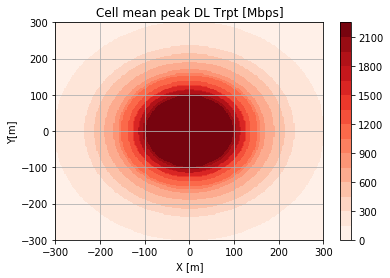

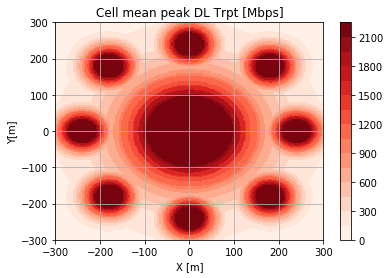

Median gNB-only throughput is 241.0 Mbps
Median gNB-and repeaters throughput is 678.0 Mbps
(101,)


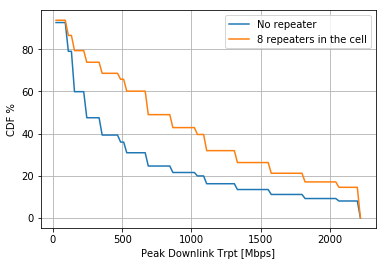

In [10]:

nx=200
x = np.linspace(-Cell_rad_m, Cell_rad_m, nx)
y = np.linspace(-Cell_rad_m, Cell_rad_m, nx)
X, Y = np.meshgrid(x, y)


X_cor=np.array(X.reshape(nx**2,1))
Y_cor=np.array(Y.reshape(nx**2,1))






d_gNB=np.zeros(X_cor.shape)
d_RE=np.zeros(X_cor.shape)
        
for i in range(X_cor.shape[0])    :
    d_gNB[i]=find_distance (gNB.x_coordinate_m, gNB.y_coordinate_m, X_cor[i], Y_cor[i])
    d_RE[i]=find_closeset_RE_distance (X_cor[i], Y_cor[i], RE)  


L_gNB=np.zeros(d_gNB.shape)
for i in range(d_gNB.shape[0]):
    L_gNB[i,0]=path_loss (d_gNB[i], Ch)

TRPT_gNB=np.zeros(L_gNB.shape)
SNR_gNB=gNB.EIRP_dBm-L_gNB-(UE.EIS_dBm_Hz+10*np.log10(BW))
for i in range(TRPT_gNB.shape[0]):
     TRPT_gNB[i,0]=throughput(SNR_gNB[i,0], BW/1e6, SE_table)
    

fig = plt.figure()
TRPT_gNB_3D=TRPT_gNB.reshape(nx,nx)
ax = plt.axes() 
CS=ax.contourf(x, y,TRPT_gNB_3D , SE_table.shape[0], cmap='Reds')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(CS)
plt.xlabel ('X [m]')
plt.ylabel ('Y[m]')
plt.title ('Cell mean peak DL Trpt [Mbps]')
plt.grid(True)
plt.show()
#ax.set_zlabel('z');    

L_RE=np.zeros(d_gNB.shape)
for i in range(d_RE.shape[0]):
    L_RE[i,0]=path_loss (d_RE[i], Ch)
TRPT_RE=np.zeros(L_RE.shape)
SNR_RE=RE[0].EIRP_dBm-L_RE-(UE.EIS_dBm_Hz+10*np.log10(BW))



for i in range(len(SNR_RE)):
    TRPT_RE[i,0]=max(throughput(SNR_RE[i,0], BW/1e6, SE_table), TRPT_gNB[i,0])

fig = plt.figure()
TRPT_RE_3D=TRPT_RE.reshape(nx,nx)
ax = plt.axes() 

CS=ax.contourf(x, y,TRPT_RE_3D , SE_table.shape[0], cmap='Reds')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(CS)
plt.xlabel ('X [m]')
plt.ylabel ('Y[m]')
plt.title ('Cell mean peak DL Trpt [Mbps]')
plt.grid(True)
plt.show()

mean_TRPT_gNB=np.median(TRPT_gNB)
print("Median gNB-only throughput is " + str(np.round(mean_TRPT_gNB)) + " Mbps")

mean_TRPT_RE=np.median(TRPT_RE)
print("Median gNB-and repeaters throughput is "+ str(np.round(mean_TRPT_RE))+ " Mbps") 


num_bins = 100
counts1, bin_edges1 = np.histogram (TRPT_gNB,num_bins)
cdf1 = np.cumsum(counts1)
counts2, bin_edges2 = np.histogram (TRPT_RE,num_bins)
cdf2 = np.cumsum(counts2)

print(bin_edges1.shape)
plt.plot(bin_edges1[1:], 100-cdf1*100/(nx**2), label='No repeater')
plt.plot(bin_edges2[1:], 100- cdf2*100/(nx**2), label='8 repeaters in the cell')
plt.xlabel ('Peak Downlink Trpt [Mbps]')
plt.ylabel('CDF %')
plt.legend(loc='upper right')
plt.grid(True)


In [1]:
import numpy as np
from numpy import sin, cos, log10, arctan
import numpy as np
import matplotlib.pyplot as plt


class ABG_Chan:
    alpha=3.53
    betha=22.4
    gamma=2.13
    LOS_exp=70
    shadowing=10
    Coherence_time=1


    def path_loss_dB (self, node1,node2):   #path loss does include antenna gain
        #this is the function that calculates the path loss between two points 
        #P1=(X1,Y1)  P2=(X2,Y2)
        #N1 is the number of antenans at node 1 and N2 is at node 2
        #We assume that they have N1 and N2 beams exactly
        #there are two sync functions that we should multiply


        PI=np.pi
        P1=node1.coords_m
        P2=node2.coords_m
        BB1=node1.beam_book_size
        BB2=node2.beam_book_size
        N1=node1.Num_antennas
        N2=node1.Num_antennas
        index1=node1.current_beam_ID
        index2=node2.current_beam_ID

        X1,Y1=P1[0],P1[1]
        X2,Y2=P2[0],P2[1]
        d_m=pow(pow(X1-X2,2)+ pow(Y1-Y2,2),0.5)
        p_LOS= np.exp(-d_m/self.LOS_exp)
        #print(p_LOS)
        PL=p_LOS*(62+20*np.log10(d_m))+\
               (1-p_LOS)* (10*self.alpha*np.log10(d_m)+\
                           self.betha+10*np.log10(28)*self.gamma+self.shadowing)



        eps=1e-8   #only added for numerical stability if the denum goes to zeros
        Phis1=np.linspace(0,np.pi,BB1) #assumption is that
        Phis2=np.linspace(0,np.pi,BB2)
        Phi_opt=np.arctan((Y2-Y1)/(X2-X1+eps)) # This only true if pure LOS
        #np.random.seed(seed)
        mu=0
        sigma=np.pi/4*(1-p_LOS)/self.Coherence_time
        
        Phi_opt+= np.random.normal(mu, sigma, 1)
        #print(Phi_opt)
        #print(Phi_opt)
        si1=PI*sin(Phis1[index1]-Phi_opt)
        si2=PI*sin(Phis1[index2]-Phi_opt-PI)
        Filter1=(sin(N1*si1/2)+eps) /(N1*sin(si1/2)+eps)
        #print(Filter1)
        Filter2=(sin(N2*si2/2)+eps) /(N2*sin(si2/2)+eps)
        #print(Filter2)

        total_PL_dB=PL-10*log10(abs(Filter1*Filter2*N1*N2))

        return(total_PL_dB[0])
    
    
    

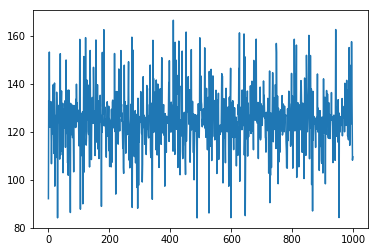

11.870321253248985
124.97721895108201


In [130]:
C=ABG_Chan()
C.Coherence_time=1
P1=(1,0)
P2=(0,0)
N1=65
N2=5
max_c=-1000
ind1=10
ind2=5
seed=0



gNB=wireless_node()
gNB.node_type='gNB'
gNB.coords_m=(0,0)
gNB.beam_book_size=128
gNB.Num_antennas=128
gNB.Tx_TRP_dBm_per_Hz=-10




Relay1=wireless_node()
Relay1.node_type='Relay'
Relay1.coords_m=(-100,0)
Relay1.beam_book_size=32
Relay1.Num_antennas=32
Relay1.Tx_TRP_dBm_per_Hz=-1000


Losses=[]
for i in range(1000):
    Losses.append(C.path_loss_dB(gNB, Relay1))
plt.plot(Losses)
plt.show()

print(np.std(Losses))
print(np.mean(Losses))

In [25]:
def add_dBm(p1_dBm,p2_dBm):
    
    return(10*np.log10(pow(10,0.1*p1_dBm)+pow(10,0.1*p2_dBm)))


class wireless_node:
    
    def __init__(self):
        self.node_type=None
        self.coords_m=(0,0)
        self.beam_book_size=1
        self.Num_antennas=1
        self.NF_dB=0
        self.Rx_sig_power_dBm_per_Hz=-174
        self.Tx_TRP_dBm_per_Hz=0
        self.Tx_noise_TRP_dBm_per_Hz=-174
        self.current_beam_ID=0
        self.ID=0
        self.SNR_dB=0



class Relay_net:
    
    def __init__(self, coherence_time):

        self.Nodes=[]  
        self.Weights_dB={} #   Weights[(nodei,nodej)]=w
        self.pairing_Donor={}
        self.channel=ABG_Chan()
        self.channel.Coherence_time=coherence_time
        self.channel.UE_mobility=1
        
    def insert_node(self,N):
        assert N.node_type in {'UE' ,'gNB'}
        N.ID=len(self.Nodes)
        self.Nodes.append(N)
    
    def insert_repeater_node (self, Relay, Donor, gain_dB):
        assert Relay.node_type=='Relay'
        assert Donor.node_type=='Donor'
        Relay.ID=len(self.Nodes)
        self.Nodes.append(Relay)
        Donor.ID=len(self.Nodes)
        self.Nodes.append(Donor)
        self.pairing_Donor[Relay]=(Donor, gain_dB)
        
    
    def update_graph_weights(self):
        #claculate the weights of the propagation graph
        
        assert self.Nodes[0].node_type =='gNB'
        for node1 in self.Nodes:
            for node2 in self.Nodes:
                
                if node1.node_type in {'gNB', 'Relay'} and node2.node_type in {'UE', 'Donor'}:
                        if (node1 not in self.pairing_Donor):
                               self.Weights_dB[(node1, node2)]=self.channel.path_loss_dB (node1, node2)
                        elif self.pairing_Donor[node1][0] != node2:
                                self.Weights_dB[(node1, node2)]=self.channel.path_loss_dB (node1, node2)
        
        for relay in self.Nodes :
            if relay.node_type=='Relay':
                donor=self.pairing_Donor[relay][0]
                self.Weights_dB[(donor,relay)]=-self.pairing_Donor[relay][1]
        
                
            
        
        
    def calculate_SNR (self):   
        #calculates the SNR of each node given the propagation weights and the gains
        
        
        num_nodes=len(self.Nodes)
        W=np.zeros((num_nodes,num_nodes))
        for i in range(num_nodes):
            for j  in range(num_nodes):
                if (self.Nodes[i], self.Nodes[j]) in self.Weights_dB:
                    W[i,j]=pow(10, -0.1*self.Weights_dB[(self.Nodes[i], self.Nodes[j])])
        WT=W.transpose()
        WT[0,0]=1
        for i in range(1, num_nodes):
            WT[i,i]=-1
        W_inv=np.linalg.inv(WT)
        Signals=10*np.log10(W_inv[:,0])+self.Nodes[0].Tx_TRP_dBm_per_Hz
        
        
        
        
        for i in range(len(self.Nodes)):
            if self.Nodes[i].node_type=='Relay':
                    
                    self.Nodes[i].Tx_noise_TRP_dBm_per_Hz=-174+self.pairing_Donor[self.Nodes[i]][1]
                
        
                
        
        
        for i in range(len(self.Nodes)):
            
            #print('Hi')
            self.Nodes[i].Rx_sig_power_dBm_per_Hz=Signals[i]
            self.Nodes[i].Rx_noise_power_dBm_per_Hz=-174+self.Nodes[i].NF_dB
            if self.Nodes[i].node_type=='UE':
                
                for j in range(len(self.Nodes)):
                    if self.Nodes[j].node_type=='Relay':
                        
                        
                        self.Nodes[i].Rx_noise_power_dBm_per_Hz=\
                        add_dBm(self.Nodes[i].Rx_noise_power_dBm_per_Hz,
                               self.Nodes[j].Tx_noise_TRP_dBm_per_Hz-self.Weights_dB[(self.Nodes[j],self.Nodes[i])])
            
            
            self.Nodes[i].SNR_dB=self.Nodes[i].Rx_sig_power_dBm_per_Hz-\
                                self.Nodes[i].Rx_noise_power_dBm_per_Hz
            
            
            
        for i in range(len(self.Nodes)):    
             if self.Nodes[i].node_type=='Relay':
                    d=self.pairing_Donor[self.Nodes[i]][0]
                    self.Nodes[i].SNR_dB=d.SNR_dB
                    
            
        
                    
    def calculate_reward(self):
        self.update_graph_weights()
        self.calculate_SNR()
        R=np.mean([node.SNR_dB for node in self.Nodes if node.node_type=='UE' ])
        return (R)
    
    def update_state(self):
        for node in self.Nodes:
            if node.node_type=='UE':
                x,y= node.coords_m[0],  node.coords_m[1]
                node.coords_m= (x+(np.random.rand()-0.5) *self.channel.UE_mobility , 
                                 (y+np.random.rand()-0.5)* self.channel.UE_mobility)
        self.calculate_SNR ()
        #State includes the current location of all the UEs and their SNR and
        #the SNR and beam_ID of all the Relay nodes and their gains
        
        UE_Coords=[]
        UE_SNRs=[]
        D_SNRs=[]
        D_Beams=[]
        R_Beams=[]
        Gains=[]
        State={}
        for node in self.Nodes:
            
             if node.node_type=='UE':
                    UE_Coords.append(node.coords_m)
                    UE_SNRs.append(node.SNR_dB)
            
        for node in self.Nodes:
            if node.node_type=='Donor':
                D_SNRs.append(node.SNR_dB)
                D_Beams.append(node.current_beam_ID)
            elif node.node_type =='Relay':
                R_Beams.append(node.current_beam_ID)
                Gain.append(self.pairing_Donor[node][1])
        
        State={'UE_SNRs': UE_SNRs, 'UE_Coords': UE_Coords,
           'D_SNRs':D_SNRs, 'D_Beams': D_Beams, 'R_Beams': R_Beams}
        Reward=self.calculate_reward()
        
        return(State,Reward)
        
    def apply_action(self, A):
        
        for node in  self.Nodes:
            if node.node_type=='Relay':
            
                assert(node in A)
                assert A[node] in range(1,8)
                donor=self.pairing_Donor[node][0]

                if A[node]==1:
                    node.current_beam_ID+=1
                    node.current_beam_ID=node.current_beam_ID%node.beam_book_size
                elif A[node]==2:
                    node.current_beam_ID-=1
                    node.current_beam_ID=node.current_beam_ID%node.beam_book_size
                    
                elif A[node]==3:
                    donor.current_beam_ID+=1
                    donor.current_beam_ID=donor.current_beam_ID%donor.beam_book_size
                elif A[node]==4:
                    donor.current_beam_ID-=1
                    donor.current_beam_ID=donor.current_beam_ID%donor.beam_book_size
                elif A[node]==5:
                    self.pairing_Donor[node][1]+=1
                elif A[node]==6:
                    self.pairing_Donor[node][1]-=1
        
                
                
                
        
                
            
            
            
            
        
        
              
    
        
        
        
    




In [27]:


gNB=wireless_node()
gNB.node_type='gNB'
gNB.coords_m=(0,0)
gNB.beam_book_size=128
gNB.Num_antennas=128
gNB.Tx_TRP_dBm_per_Hz=-10




Relay1=wireless_node()
Relay1.node_type='Relay'
Relay1.coords_m=(-100,200)
Relay1.beam_book_size=32
Relay1.Num_antennas=32
Relay1.Tx_TRP_dBm_per_Hz=-1000




Donor1=wireless_node()
Donor1.node_type='Donor'
Donor1.coords_m=(-100,200)
Donor1.beam_book_size=32
Donor1.Num_antennas=32
Donor1.NF_dB=5
Donor1.Tx_TRP_dBm_per_Hz=-1000

UE1=wireless_node()
UE1.node_type='UE'
UE1.coords_m=(-99,200)
UE1.beam_book_size=4
UE1.Num_antennas=4
UE1.Tx_TRP_dBm_per_Hz=-1000
UE1.NF_dB=5

relay_net=Relay_net(1e5)
relay_net.insert_node(gNB)
relay_net.insert_node(UE1)
relay_net.insert_repeater_node (Relay1, Donor1, 100)

relay_net.update_graph_weights()
print([node.node_type for node in relay_net.Nodes])

S,R=relay_net.update_state()

print('State:')
print(S)
print('Reward:')
print(R)




print([relay_net.Weights_dB[l] for l in relay_net.Weights_dB])
print(relay_net.calculate_reward())

A={Relay1:3}

relay_net.apply_action(A)

S,R=relay_net.update_state()

print('State:')
print(S)
print('Reward:')
print(R)


['gNB', 'UE', 'Relay', 'Donor']
State:
{'UE_SNRs': [16.28898226948678], 'UE_Coords': [(-99.49342925496894, 199.6928812005299)], 'D_SNRs': [11.28898325117214], 'D_Beams': [0], 'R_Beams': [0]}
Reward:
16.27716338797032
[146.65554686797103, 147.7224617904226, 56.61048574650738, -100]
16.293215584605846
State:
{'UE_SNRs': [16.293215584605846], 'UE_Coords': [(-99.36169442382653, 200.01468696284266)], 'D_SNRs': [11.293591351913108], 'D_Beams': [1], 'R_Beams': [0]}
Reward:
11.027456051251306


In [15]:
np.random.rand()

0.3195174163230651